In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

### Importing the dataset

In [2]:
df = pd.read_csv('train.csv', index_col=0)
df_test = pd.read_csv('test.csv', index_col=0)

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Columns: 171 entries, circle_id to churn_probability
dtypes: float64(135), int64(27), object(9)
memory usage: 91.9+ MB


circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
id                                                              
0         109             0.0             0.0             0.0   
1         109             0.0             0.0             0.0   
2         109             0.0             0.0             0.0   
3         109             0.0             0.0             0.0   
4         109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
id                                                                           
0             6/30/2014            7/31/2014            8/31/2014   31.277   
1             6/30/2014            7/31/2014            8/31/2014    0.000   
2             6/30/2014            7/31/2014            8/31/2014   60.806   
3             6/30/2014            7/31/2014            8/31/2014  156.362   
4             6/30/2014            7/31/2014            8/31/2014  240.708   

     arpu_7   arpu_8  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
id                    ...                                                   
0    87.009    7.527  ...            0            0        NaN        NaN   
1   122.787   42.953  ...            0            0        NaN        1.0   
2   103.176    0.000  ...            0            0        NaN        NaN   
3   205.260  111.095  ...            0            0        NaN        NaN   
4   128.191  101.565  ...            1            0        1.0        1.0   

    fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
id                                                                          
0         NaN  1958         0.0         0.0         0.0                  0  
1         NaN   710         0.0         0.0         0.0                  0  
2         NaN   882         0.0         0.0         0.0                  0  
3         NaN   982         0.0         0.0         0.0                  0  
4         1.0   647         0.0         0.0         0.0                  0  

[5 rows x 171 columns]

In [4]:
df.shape

(69999, 171)

In [5]:
# Checking the informations of the dataset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 171 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    circle_id                 int64  
 1    loc_og_t2o_mou            float64
 2    std_og_t2o_mou            float64
 3    loc_ic_t2o_mou            float64
 4    last_date_of_month_6      object 
 5    last_date_of_month_7      object 
 6    last_date_of_month_8      object 
 7    arpu_6                    float64
 8    arpu_7                    float64
 9    arpu_8                    float64
 10   onnet_mou_6               float64
 11   onnet_mou_7               float64
 12   onnet_mou_8               float64
 13   offnet_mou_6              float64
 14   offnet_mou_7              float64
 15   offnet_mou_8              float64
 16   roam_ic_mou_6             float64
 17   roam_ic_mou_7             float64
 18   roam_ic_mou_8             float64
 19   roam_og_mou_6             float64
 20   roam

In [6]:
#statistical summary of all the numerical variables
df.describe(include="all")

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
count     69999.0         69297.0         69297.0         69297.0   
unique        NaN             NaN             NaN             NaN   
top           NaN             NaN             NaN             NaN   
freq          NaN             NaN             NaN             NaN   
mean        109.0             0.0             0.0             0.0   
std           0.0             0.0             0.0             0.0   
min         109.0             0.0             0.0             0.0   
25%         109.0             0.0             0.0             0.0   
50%         109.0             0.0             0.0             0.0   
75%         109.0             0.0             0.0             0.0   
max         109.0             0.0             0.0             0.0   

       last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
count                 69999                69600                69266   
unique                    1                    1                    1   
top               6/30/2014            7/31/2014            8/31/2014   
freq                  69999                69600                69266   
mean                    NaN                  NaN                  NaN   
std                     NaN                  NaN                  NaN   
min                     NaN                  NaN                  NaN   
25%                     NaN                  NaN                  NaN   
50%                     NaN                  NaN                  NaN   
75%                     NaN                  NaN                  NaN   
max                     NaN                  NaN                  NaN   

              arpu_6        arpu_7        arpu_8  ...   sachet_3g_7  \
count   69999.000000  69999.000000  69999.000000  ...  69999.000000   
unique           NaN           NaN           NaN  ...           NaN   
top              NaN           NaN           NaN  ...           NaN   
freq             NaN           NaN           NaN  ...           NaN   
mean      283.134365    278.185912    278.858826  ...      0.081444   
std       334.213918    344.366927    351.924315  ...      0.634547   
min     -2258.709000  -1289.715000   -945.808000  ...      0.000000   
25%        93.581000     86.714000     84.095000  ...      0.000000   
50%       197.484000    191.588000    192.234000  ...      0.000000   
75%       370.791000    365.369500    369.909000  ...      0.000000   
max     27731.088000  35145.834000  33543.624000  ...     33.000000   

         sachet_3g_8     fb_user_6     fb_user_7     fb_user_8           aon  \
count   69999.000000  17568.000000  17865.000000  18417.000000  69999.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.085487      0.916325      0.909544      0.890319   1220.639709   
std         0.680035      0.276907      0.286842      0.312501    952.426321   
min         0.000000      0.000000      0.000000      0.000000    180.000000   
25%         0.000000      1.000000      1.000000      1.000000    468.000000   
50%         0.000000      1.000000      1.000000      1.000000    868.000000   
75%         0.000000      1.000000      1.000000      1.000000   1813.000000   
max        41.000000      1.000000      1.000000      1.000000   4337.000000   

          aug_vbc_3g    jul_vbc_3g   jun_vbc_3g  churn_probability  
count   69999.000000  69999.000000  69999.00000       69999.000000  
unique           NaN           NaN          NaN                NaN  
top              NaN           NaN          NaN                NaN  
freq             NaN           NaN          NaN                NaN  
mean       68.108597     65.935830     60.07674           0.101887  
std       269.328659    267.899034    257.22681           0.302502  
min  

In [7]:
# all numeric (float and int) variables in the train dataset
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
id                                                                       
0         109             0.0             0.0             0.0   31.277   
1         109             0.0             0.0             0.0    0.000   
2         109             0.0             0.0             0.0   60.806   
3         109             0.0             0.0             0.0  156.362   
4         109             0.0             0.0             0.0  240.708   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  ...  sachet_3g_7  \
id                                                           ...                
0    87.009    7.527        48.58       124.38         1.29  ...            0   
1   122.787   42.953         0.00         0.00         0.00  ...            0   
2   103.176    0.000         0.53        15.93         0.00  ...            0   
3   205.260  111.095         7.26        16.01         0.00  ...            0   
4   128.191  101.565        21.28         4.83         6.13  ...            1   

    sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  \
id                                                                   
0             0        NaN        NaN        NaN  1958         0.0   
1             0        NaN        1.0        NaN   710         0.0   
2             0        NaN        NaN        NaN   882         0.0   
3             0        NaN        NaN        NaN   982         0.0   
4             0        1.0        1.0        1.0   647         0.0   

    jul_vbc_3g  jun_vbc_3g  churn_probability  
id                                             
0          0.0         0.0                  0  
1          0.0         0.0                  0  
2          0.0         0.0                  0  
3          0.0         0.0                  0  
4          0.0         0.0                  0  

[5 rows x 162 columns]

In [8]:
# all numeric (float and int) variables in the test dataset
df_test_numeric = df_test.select_dtypes(include=['float64', 'int64'])
df_test_numeric.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
id                                                                          
69999        109             0.0             0.0             0.0   91.882   
70000        109             0.0             0.0             0.0  414.168   
70001        109             0.0             0.0             0.0  329.844   
70002        109             0.0             0.0             0.0   43.550   
70003        109             0.0             0.0             0.0  306.854   

        arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  ...  \
id                                                              ...   
69999   65.330   64.445        31.78        20.23        23.11  ...   
70000  515.568  360.868        75.51        41.21        19.84  ...   
70001  434.884  746.239         7.54         7.86         8.40  ...   
70002  171.390   24.400         5.31         2.16         0.00  ...   
70003  406.289  413.329       450.93       609.03       700.68  ...   

       sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
id                                                                              
69999            0            0            0        NaN        NaN        NaN   
70000            0            0            0        NaN        NaN        NaN   
70001            0            0            0        NaN        NaN        NaN   
70002            0            0            0        NaN        NaN        NaN   
70003            0            0            0        NaN        NaN        NaN   

        aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
id                                               
69999  1692        0.00        0.00        0.00  
70000  2533        0.00        0.00        0.00  
70001   277      525.61      758.41      241.84  
70002  1244        0.00        0.00        0.00  
70003   462        0.00        0.00        0.00  

[5 rows x 161 columns]

In [9]:
# correlation matrix
cor = df_numeric.corr()
cor

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
circle_id                NaN             NaN             NaN             NaN   
loc_og_t2o_mou           NaN             NaN             NaN             NaN   
std_og_t2o_mou           NaN             NaN             NaN             NaN   
loc_ic_t2o_mou           NaN             NaN             NaN             NaN   
arpu_6                   NaN             NaN             NaN             NaN   
...                      ...             ...             ...             ...   
aon                      NaN             NaN             NaN             NaN   
aug_vbc_3g               NaN             NaN             NaN             NaN   
jul_vbc_3g               NaN             NaN             NaN             NaN   
jun_vbc_3g               NaN             NaN             NaN             NaN   
churn_probability        NaN             NaN             NaN             NaN   

                     arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
circle_id               NaN       NaN       NaN          NaN          NaN   
loc_og_t2o_mou          NaN       NaN       NaN          NaN          NaN   
std_og_t2o_mou          NaN       NaN       NaN          NaN          NaN   
loc_ic_t2o_mou          NaN       NaN       NaN          NaN          NaN   
arpu_6             1.000000  0.743730  0.643193     0.446970     0.330179   
...                     ...       ...       ...          ...          ...   
aon                0.025875  0.023818  0.033256    -0.045107    -0.045651   
aug_vbc_3g         0.168365  0.189943  0.224868    -0.012440    -0.009769   
jul_vbc_3g         0.184225  0.218318  0.177637    -0.012149    -0.008712   
jun_vbc_3g         0.217785  0.171154  0.157545    -0.008332    -0.011974   
churn_probability  0.025351 -0.057809 -0.157566     0.061830     0.012085   

                   onnet_mou_8  ...  sachet_3g_7  sachet_3g_8  fb_user_6  \
circle_id                  NaN  ...          NaN          NaN        NaN   
loc_og_t2o_mou             NaN  ...          NaN          NaN        NaN   
std_og_t2o_mou             NaN  ...          NaN          NaN        NaN   
loc_ic_t2o_mou             NaN  ...          NaN          NaN        NaN   
arpu_6                0.272762  ...     0.066930     0.050399  -0.012517   
...                        ...  ...          ...          ...        ...   
aon                  -0.044237  ...    -0.031595    -0.031420  -0.011127   
aug_vbc_3g           -0.006762  ...     0.089689     0.101584   0.133510   
jul_vbc_3g           -0.008565  ...     0.103164     0.085656   0.137168   
jun_vbc_3g           -0.006606  ...     0.093014     0.077467   0.139194   
churn_probability    -0.040269  ...    -0.011153    -0.031369  -0.025344   

                   fb_user_7  fb_user_8       aon  aug_vbc_3g  jul_vbc_3g  \
circle_id                NaN        NaN       NaN         NaN         NaN   
loc_og_t2o_mou           NaN        NaN       NaN         NaN         NaN   
std_og_t2o_mou           NaN        NaN       NaN         NaN         NaN   
loc_ic_t2o_mou           NaN        NaN       NaN         NaN         NaN   
arpu_6             -0.018098  -0.080902  0.025875    0.168365    0.184225   
...                      ...        ...       ...         ...         ...   
aon                -0.022611  -0.021808  1.000000    0.006073    0.006673   
aug_vbc_3g          0.146156   0.171713  0.006073    1.000000    0.691012   
jul_vbc_3g          0.151128   0.153853  0.006673    0.691012    1.000000   
jun_vbc_3g          0.133091   0.139579  0.001365    0.573275    0.676636   
churn_probability  -0.026081  -0.063580 -0.135177   -0.063040   -0.040102   

                   jun_vbc_3g  churn_probability  
circle_id                 NaN                NaN  
loc_og_t2o_mou            NaN                NaN  
std_og_t2o_mou            NaN                NaN  
loc_ic_t2o_mou            NaN                NaN  
arpu_6               0.217785           

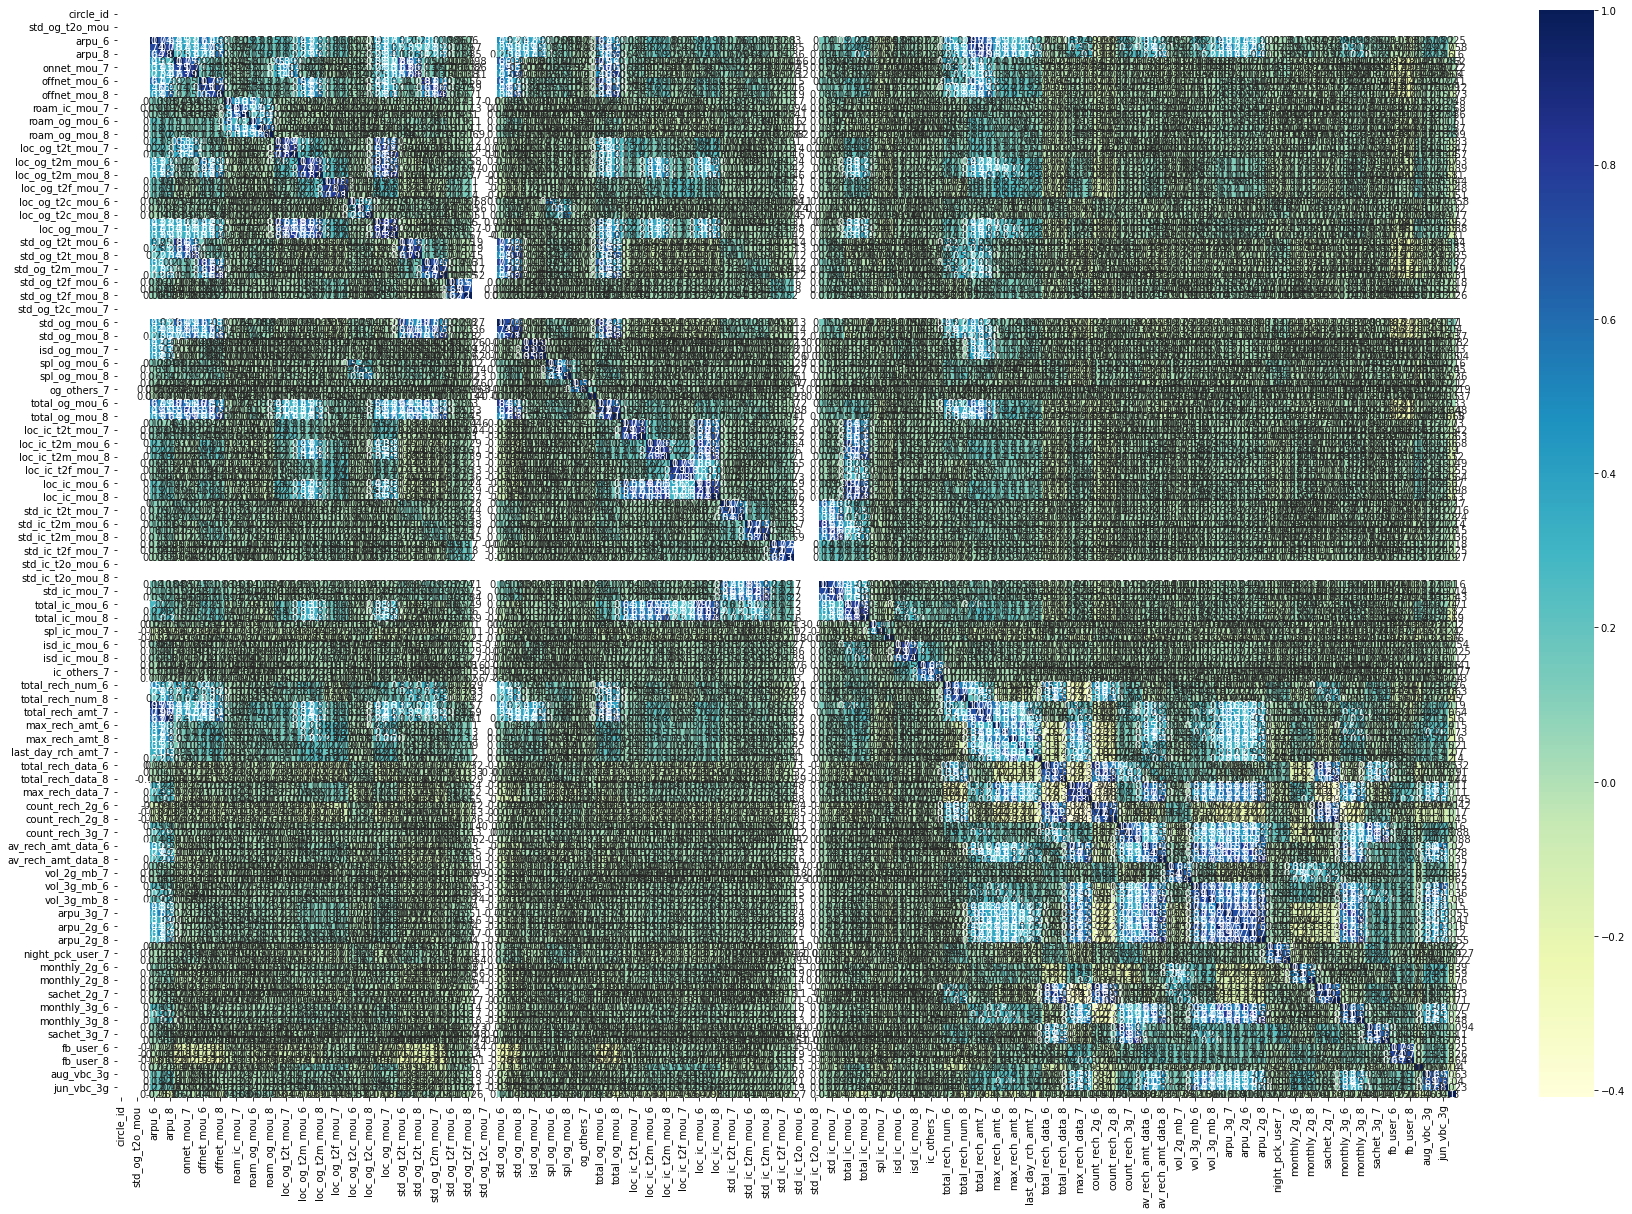

In [10]:
# plotting correlations on a heatmap
# figure size
plt.figure(figsize=(30,20))
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

# 2. Data Cleaning
Lets now conduct some data cleaning steps. 
We have seen that there are missing values in the dataset. 

In [11]:
#finding the list of columns with any missing value
missing_col_list = round(100*(df.isnull().sum()/len(df)), 2)
missing_col_list.loc[missing_col_list > 0]

loc_og_t2o_mou           1.00
std_og_t2o_mou           1.00
loc_ic_t2o_mou           1.00
last_date_of_month_7     0.57
last_date_of_month_8     1.05
                        ...  
night_pck_user_7        74.48
night_pck_user_8        73.69
fb_user_6               74.90
fb_user_7               74.48
fb_user_8               73.69
Length: 125, dtype: float64

In [12]:
#finding the list of columns with any missing value
missing_col_list_test = round(100*(df_test.isnull().sum()/len(df)), 2)
missing_col_list_test.loc[missing_col_list_test > 0]

loc_og_t2o_mou           0.45
std_og_t2o_mou           0.45
loc_ic_t2o_mou           0.45
last_date_of_month_7     0.29
last_date_of_month_8     0.52
                        ...  
night_pck_user_7        31.85
night_pck_user_8        31.54
fb_user_6               32.02
fb_user_7               31.85
fb_user_8               31.54
Length: 125, dtype: float64

In [13]:
# Checking the value counts
for index,cols in enumerate(df.columns):
    print("\033[1m",str(index+1)+")",cols,"\033[0m")
    print(df[cols].value_counts())
    print("\n")

 1) circle_id 
109    69999
Name: circle_id, dtype: int64


 2) loc_og_t2o_mou 
0.0    69297
Name: loc_og_t2o_mou, dtype: int64


 3) std_og_t2o_mou 
0.0    69297
Name: std_og_t2o_mou, dtype: int64


 4) loc_ic_t2o_mou 
0.0    69297
Name: loc_ic_t2o_mou, dtype: int64


 5) last_date_of_month_6 
6/30/2014    69999
Name: last_date_of_month_6, dtype: int64


 6) last_date_of_month_7 
7/31/2014    69600
Name: last_date_of_month_7, dtype: int64


 7) last_date_of_month_8 
8/31/2014    69266
Name: last_date_of_month_8, dtype: int64


 8) arpu_6 
 0.000      2603
 20.000       72
-5.000        72
 1.000        49
 1.500        38
            ... 
 119.580       1
 393.027       1
 48.879        1
 179.191       1
 168.269       1
Name: arpu_6, Length: 61615, dtype: int64


 9) arpu_7 
 0.000      2666
-5.000       107
 20.000       49
 1.000        38
 1.500        37
            ... 
 233.736       1
 503.358       1
 183.610       1
 332.326       1
 42.815        1
Name: arpu_7, Length: 61

0.00      33706
0.01        253
0.03        193
0.06        192
0.08        183
          ...  
350.44        1
14.40         1
48.19         1
102.86        1
21.11         1
Name: spl_og_mou_8, Length: 3848, dtype: int64


 59) og_others_6 
0.00     55363
0.21       413
0.43       155
0.20       111
0.65       102
         ...  
12.06        1
16.11        1
16.61        1
15.59        1
20.99        1
Name: og_others_6, Length: 914, dtype: int64


 60) og_others_7 
0.00     67072
0.16        12
0.33         6
0.05         6
0.38         5
         ...  
42.93        1
3.41         1
1.13         1
7.13         1
1.91         1
Name: og_others_7, Length: 148, dtype: int64


 61) og_others_8 
0.00    65996
0.16       15
0.01       10
0.30        7
0.03        6
        ...  
0.28        1
3.99        1
2.86        1
0.88        1
7.44        1
Name: og_others_8, Length: 179, dtype: int64


 62) total_og_mou_6 
0.00       7012
0.21         63
0.58         19
0.43         19
0.20       

0.00      54412
0.01         65
0.02         52
0.03         37
0.04         30
          ...  
13.75         1
321.86        1
181.76        1
932.25        1
280.70        1
Name: vol_2g_mb_6, Length: 11494, dtype: int64


 138) vol_2g_mb_7 
0.00      54219
0.01         69
0.02         60
0.04         35
0.03         32
          ...  
782.79        1
123.47        1
81.31         1
201.38        1
244.59        1
Name: vol_2g_mb_7, Length: 11443, dtype: int64


 139) vol_2g_mb_8 
0.00       54078
0.01          73
0.02          51
0.03          39
0.07          35
           ...  
105.10         1
1038.93        1
218.48         1
710.54         1
982.54         1
Name: vol_2g_mb_8, Length: 11359, dtype: int64


 140) vol_3g_mb_6 
0.00       59807
0.01          11
0.03           9
0.02           8
0.09           7
           ...  
269.50         1
2420.26        1
2222.60        1
399.49         1
1253.47        1
Name: vol_3g_mb_6, Length: 9768, dtype: int64


 141) vol_3g_mb_7 
0.0

In [14]:
# Checking for columns having same values throughout the column
nunique = df.nunique()
unique_col = nunique[nunique == 1].index
unique_col

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [15]:
#dropping above columns from train dataset as they have only 0.0 as value
df = df.drop(unique_col, axis=1)

In [16]:
# Checking for columns having same values throughout the column
nunique = df_test.nunique()
unique_col = nunique[nunique == 1].index
unique_col

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [17]:
#dropping above columns from train dataset as they have only 0.0 as value
df_test = df_test.drop(unique_col, axis=1)

In [18]:
df.shape

(69999, 158)

In [19]:
df_test.shape

(30000, 157)

In [20]:
missing_col_list = round(100*(df.isnull().sum()/len(df)), 2)
missing_col_list.loc[missing_col_list > 0]

onnet_mou_6          3.95
onnet_mou_7          3.84
onnet_mou_8          5.29
offnet_mou_6         3.95
offnet_mou_7         3.84
                    ...  
night_pck_user_7    74.48
night_pck_user_8    73.69
fb_user_6           74.90
fb_user_7           74.48
fb_user_8           73.69
Length: 114, dtype: float64

In [21]:
missing_col_list = round(100*(df_test.isnull().sum()/len(df)), 2)
missing_col_list.loc[missing_col_list > 0]

onnet_mou_6          1.67
onnet_mou_7          1.67
onnet_mou_8          2.39
offnet_mou_6         1.67
offnet_mou_7         1.67
                    ...  
night_pck_user_7    31.85
night_pck_user_8    31.54
fb_user_6           32.02
fb_user_7           31.85
fb_user_8           31.54
Length: 114, dtype: float64

In [22]:
# Extracting the categorical columns
cat_cols = ["fb_user_8","fb_user_7","fb_user_6","night_pck_user_8",
            "night_pck_user_7","night_pck_user_6"]

# Imputing the null values of categorical columns with other new category(-1)
for cols in cat_cols:
    df[cols].fillna(value=-1, inplace=True)
    
# Imputing the null values of categorical columns with other new category(-1)
for cols in cat_cols:
    df_test[cols].fillna(value=-1, inplace=True)

In [23]:
missing_col_list = round(100*(df.isnull().sum()/len(df)), 2)
missing_col_list.loc[missing_col_list > 0]

onnet_mou_6      3.95
onnet_mou_7      3.84
onnet_mou_8      5.29
offnet_mou_6     3.95
offnet_mou_7     3.84
                ...  
arpu_3g_7       74.48
arpu_3g_8       73.69
arpu_2g_6       74.90
arpu_2g_7       74.48
arpu_2g_8       73.69
Length: 108, dtype: float64

In [24]:
missing_col_list = round(100*(df_test.isnull().sum()/len(df)), 2)
missing_col_list.loc[missing_col_list > 0]

onnet_mou_6      1.67
onnet_mou_7      1.67
onnet_mou_8      2.39
offnet_mou_6     1.67
offnet_mou_7     1.67
                ...  
arpu_3g_7       31.85
arpu_3g_8       31.54
arpu_2g_6       32.02
arpu_2g_7       31.85
arpu_2g_8       31.54
Length: 108, dtype: float64

In [25]:
# Extracting the numeric columns from the dataset
num_cols = df.columns.difference(cat_cols)

# Lets extract the recharge, arpu, other columns from the num_cols
mou_cols = [x for x in num_cols if "mou" in x]
rec_cols = [x for x in num_cols if "rec" in x]
arpu_cols = [x for x in num_cols if "arpu" in x]
other_cols = [x for x in num_cols if "other" in x]

# Imputing ARPU and recharge columns with zero
def zero_imputation(list_col):
    for nam in df:
        for cols in list_col:
            df[cols].fillna(value=0, inplace=True)
        
# Imputing zero for all the remaining columns
zero_imputation(mou_cols)
zero_imputation(rec_cols)
zero_imputation(arpu_cols)
zero_imputation(other_cols)

# Checking the missing values after imputation
print("The total missing values in the dataset after cleaning is",df.isnull().sum().sum())

The total missing values in the dataset after cleaning is 0


In [26]:
# Extracting the numeric columns from the dataset
num_cols_test = df_test.columns.difference(cat_cols)

# Lets extract the recharge, arpu, other columns from the num_cols_test
mou_cols_test = [k for k in num_cols_test if "mou" in k]
rec_cols_test = [k for k in num_cols_test if "rec" in k]
arpu_cols_test = [k for k in num_cols_test if "arpu" in k]
other_cols_test = [k for k in num_cols_test if "other" in k]

# Imputing ARPU and recharge columns with zero
def zero_imputation_test(list_col):
    for nam in df_test:
        for cols in list_col:
            df_test[cols].fillna(value=0, inplace=True)
            
# Imputing zero for all the remaining columns
zero_imputation_test(mou_cols_test)
zero_imputation_test(rec_cols_test)
zero_imputation_test(arpu_cols_test)
zero_imputation_test(other_cols_test)

# Checking the missing values after imputation
print("The total missing values in the test dataset after cleaning is",df_test.isnull().sum().sum())

The total missing values in the test dataset after cleaning is 0


In [27]:
missing_col_list = round(100*(df.isnull().sum()/len(df)), 2)
missing_col_list.loc[missing_col_list > 0]

Series([], dtype: float64)

In [28]:
missing_col_list = round(100*(df_test.isnull().sum()/len(df)), 2)
missing_col_list.loc[missing_col_list > 0]

Series([], dtype: float64)

In [29]:
#check the shape now
df.shape

(69999, 158)

In [30]:
#check the shape now
df_test.shape

(30000, 157)

In [31]:
df.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=158)

### Data Preparation 
Lets now prepare the data and build the model.

### Splitting Data into Training and Test Sets

In [32]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop(['churn_probability','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1)
# Putting response variable to y
y = df['churn_probability']

df_test_X = df_test.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1)

In [33]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [34]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (48999, 151)
X_test (21000, 151)
y_train (48999,)
y_test (21000,)


## Model 1: PCA + RF

In [35]:
#Apply PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

### Components from the PCA

In [36]:
pca.components_

array([[ 1.92440320e-01,  2.19089206e-01,  2.12039736e-01, ...,
         3.19481688e-02,  3.19064305e-02,  2.93621576e-02],
       [ 6.31228541e-02,  6.33801161e-02,  6.71769603e-02, ...,
         1.24074108e-01,  1.27432378e-01,  1.23067343e-01],
       [ 1.41361139e-02,  1.76902456e-02,  1.51741220e-02, ...,
         9.79859948e-02,  1.00661151e-01,  9.90485231e-02],
       ...,
       [-0.00000000e+00, -3.32266475e-19,  1.65896938e-18, ...,
        -5.78927296e-19,  1.04246247e-19,  5.11961068e-19],
       [-0.00000000e+00, -2.72590558e-18, -6.31003370e-18, ...,
        -5.09171637e-20,  3.98525321e-19,  1.00893229e-19],
       [-0.00000000e+00,  6.14162886e-19, -4.81227782e-18, ...,
        -8.70490775e-19,  3.18861751e-19, -4.74170038e-19]])

In [37]:
pca.explained_variance_ratio_

array([2.64926901e-01, 1.56544793e-01, 1.46487240e-01, 7.40390181e-02,
       4.92597070e-02, 4.59077573e-02, 4.21490535e-02, 3.00039055e-02,
       2.10022854e-02, 2.02796428e-02, 1.56024390e-02, 1.43788809e-02,
       1.21999821e-02, 9.93821430e-03, 8.57702996e-03, 7.88339620e-03,
       7.58946916e-03, 6.28919655e-03, 5.27502596e-03, 5.16603639e-03,
       4.17420690e-03, 3.92476594e-03, 3.87455477e-03, 3.64933627e-03,
       3.41900029e-03, 3.05101659e-03, 2.55798922e-03, 2.24747926e-03,
       2.13588343e-03, 2.06191631e-03, 1.99327881e-03, 1.95574908e-03,
       1.58290265e-03, 1.45409415e-03, 1.36422874e-03, 1.32486170e-03,
       9.65362866e-04, 9.47648395e-04, 9.06817608e-04, 8.89848463e-04,
       8.13392423e-04, 7.54603582e-04, 6.93855339e-04, 6.90596236e-04,
       6.59179169e-04, 6.41464755e-04, 5.95382206e-04, 5.80504374e-04,
       5.60321286e-04, 5.51325658e-04, 4.91893534e-04, 4.57254118e-04,
       4.14889734e-04, 3.98914584e-04, 3.82934862e-04, 3.14860111e-04,
      

In [38]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

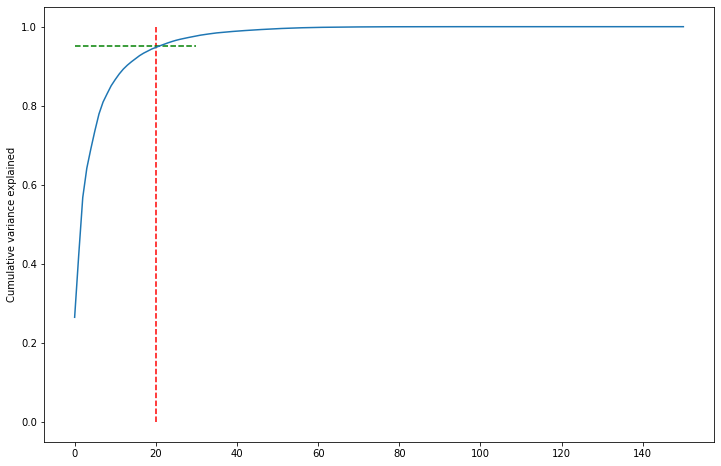

In [39]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=20, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [40]:
import matplotlib.pyplot as plt

<BarContainer object of 151 artists>

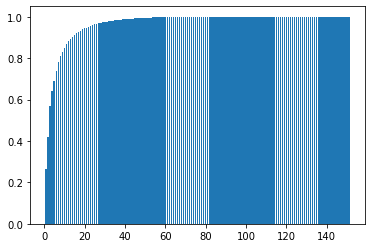

In [41]:
plt.bar(range(1,len(var_cumu)+1), var_cumu)

20 components can actually explain 95% variance

In [42]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=20)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(48999, 20)

In [43]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(20, 20)

<AxesSubplot:>

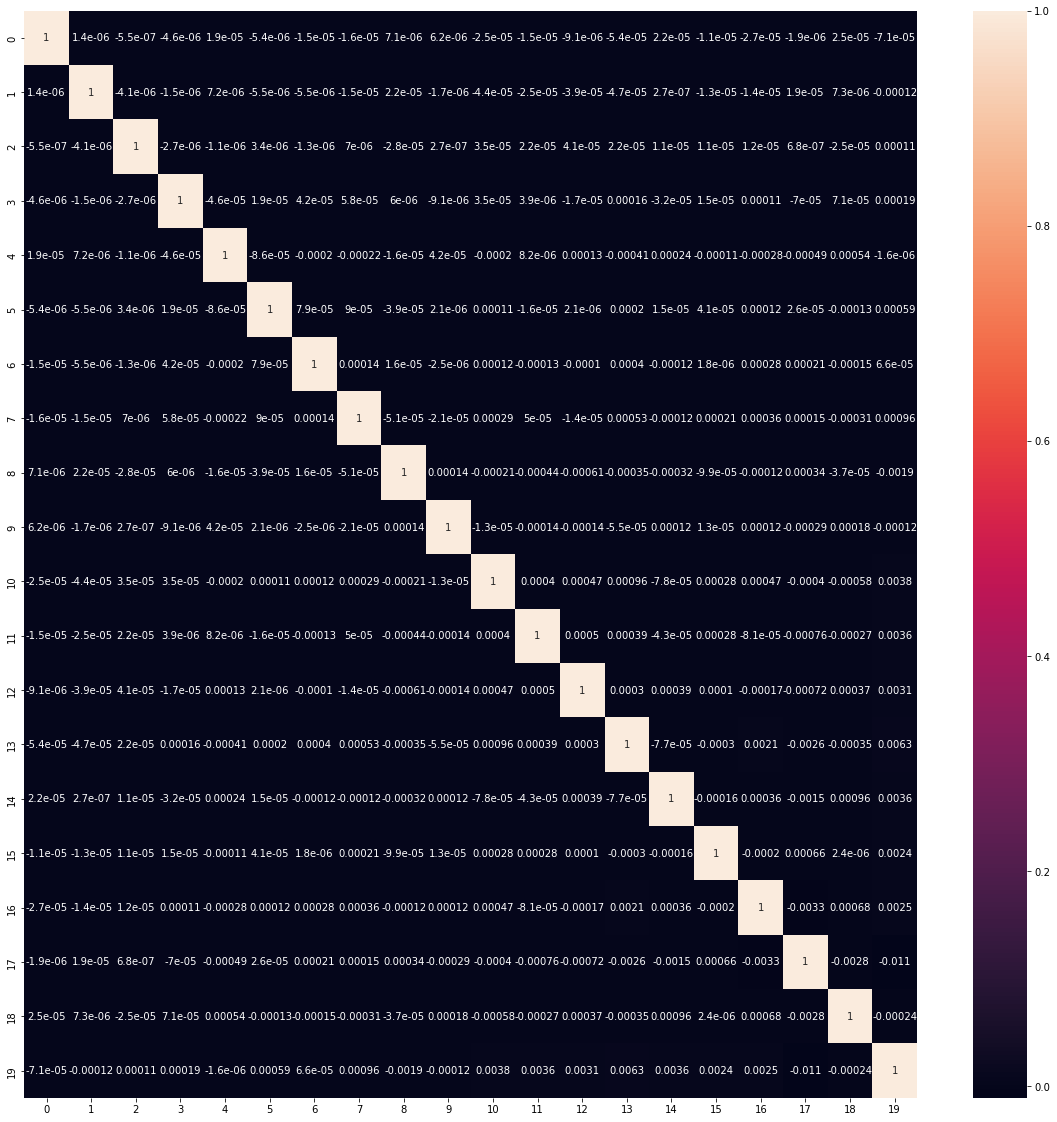

In [44]:
#Plotting the heatmap of the corr matrix
plt.figure(figsize=[20,20])
sns.heatmap(corrmat, annot=True)

In [45]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(21000, 20)

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3, class_weight="balanced")
rf.fit(df_train_pca, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=10,
                       random_state=42)

In [48]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1608637542)

In [49]:
sample_tree = rf.estimators_[4]

In [50]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from sklearn.metrics import confusion_matrix, accuracy_score

In [51]:
df_pca = pd.DataFrame(data = df_train_pca)

In [52]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=df_pca.columns, 
                    class_names=['Churn', "No Churn"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

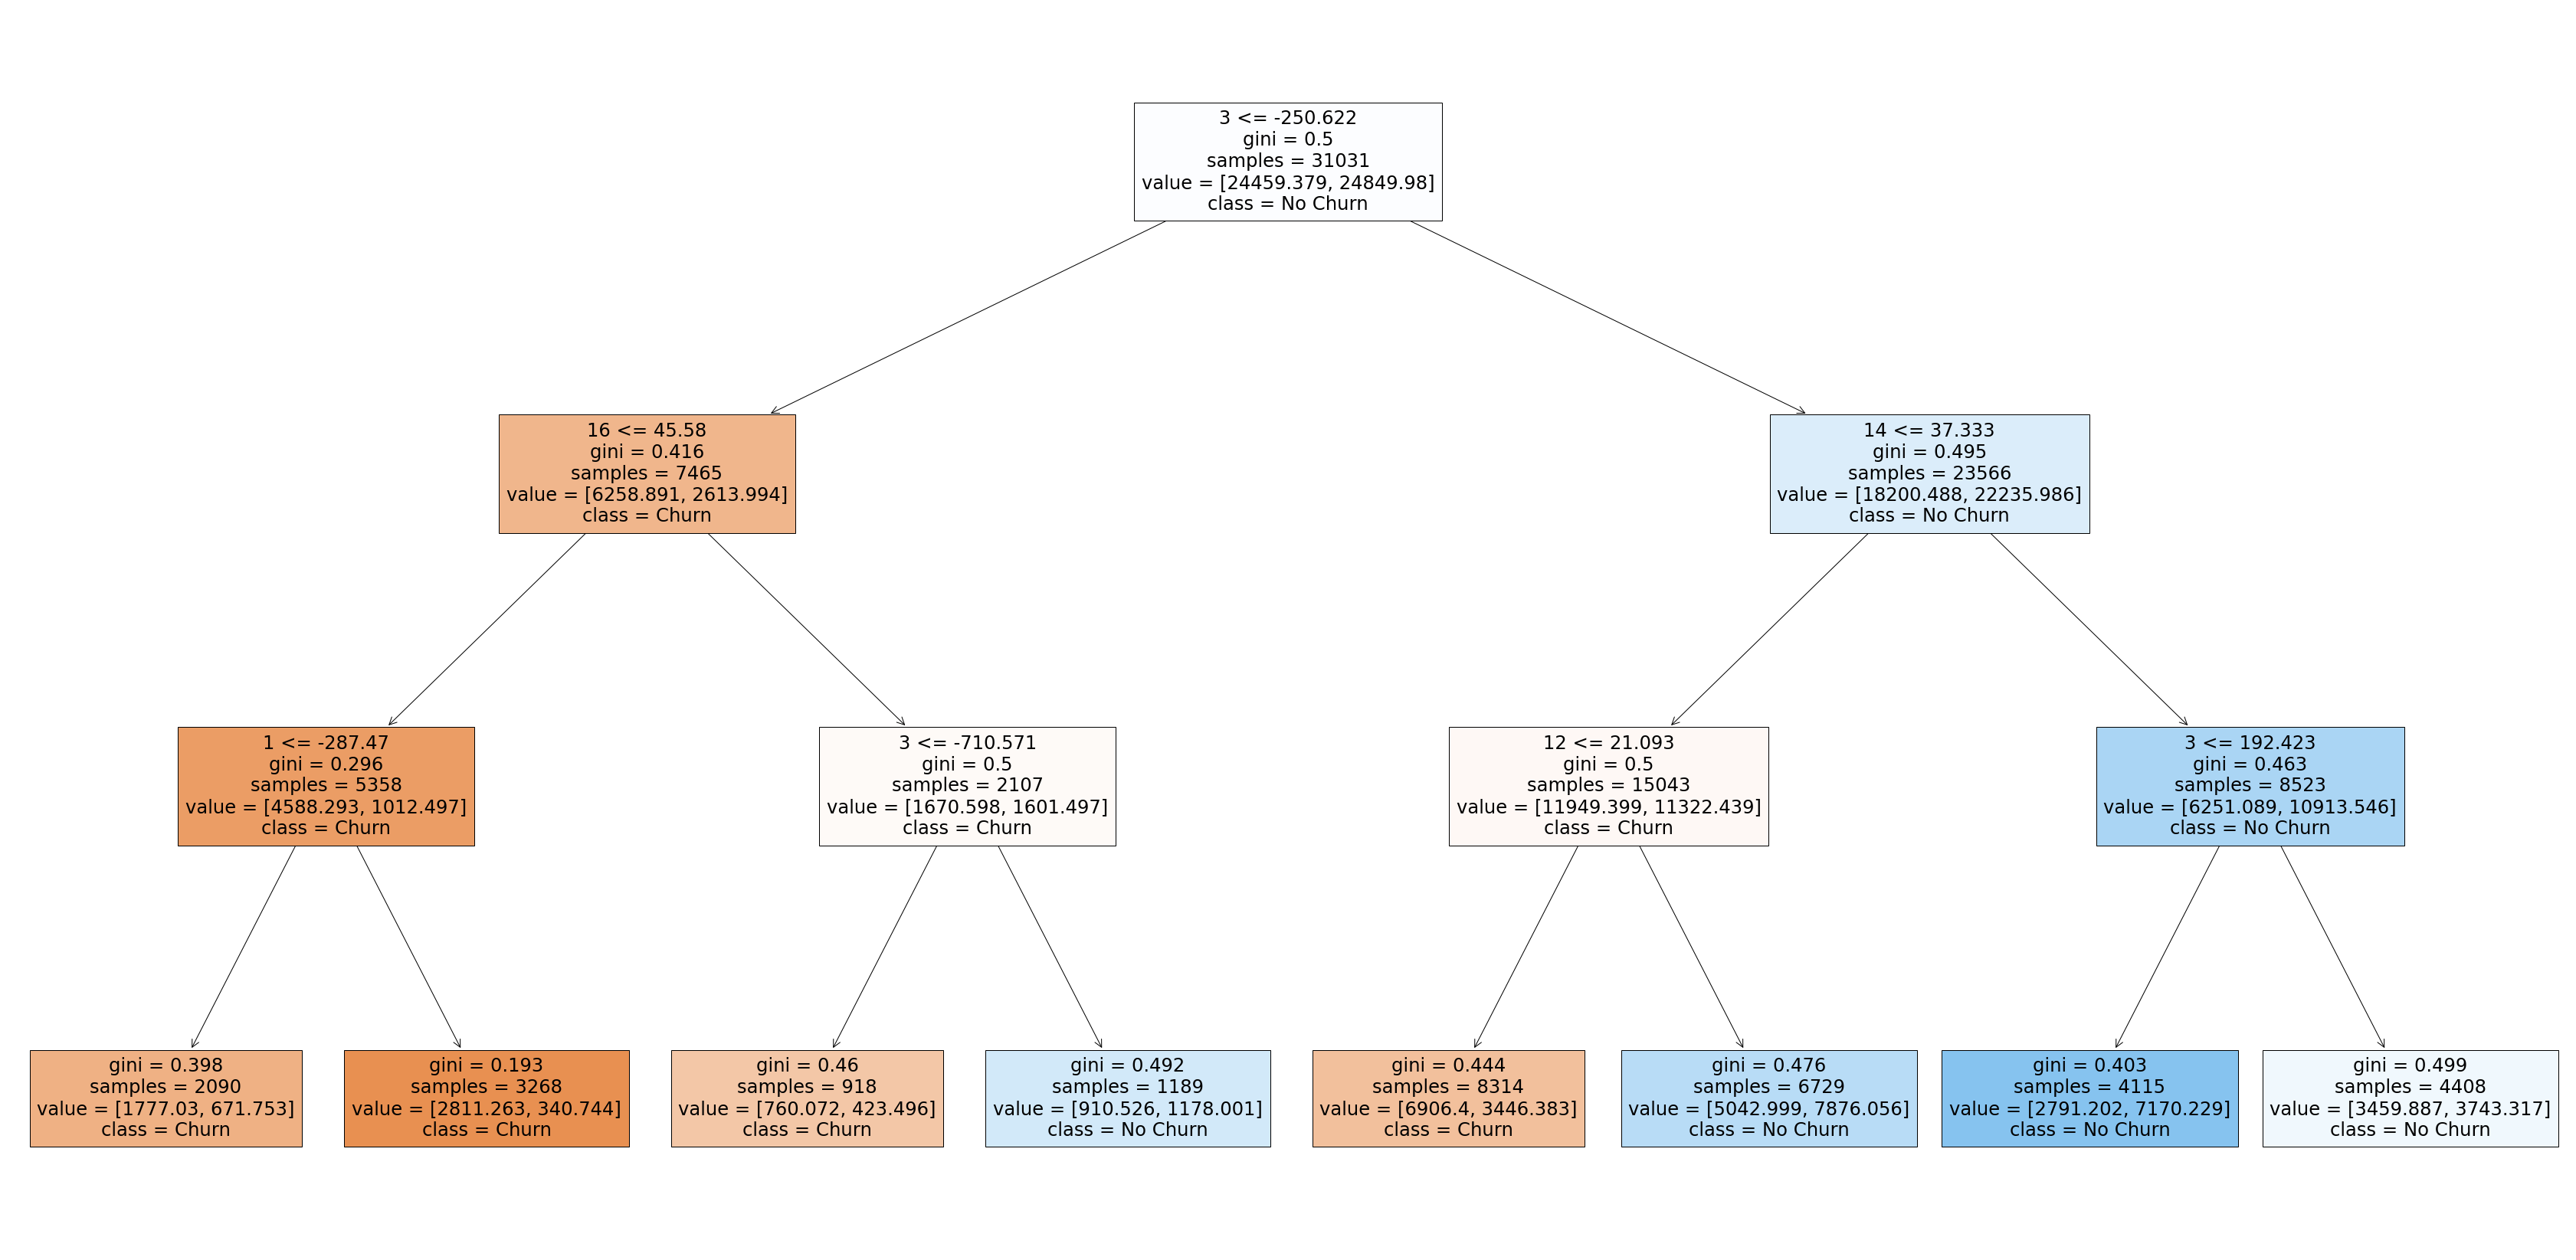

In [53]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(sample_tree, feature_names = df_pca.columns,class_names=['Churn', 'No Churn'],filled=True);

In [54]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))

In [55]:
evaluate_model(rf)

Train Accuracy : 0.7492601889834486
Train Confusion Matrix:
[[32876 11090]
 [ 1196  3837]]
--------------------------------------------------
Test Accuracy : 0.7492857142857143
Test Confusion Matrix:
[[14140  4761]
 [  504  1595]]


In [56]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [57]:
classifier_rf.fit(df_train_pca, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [58]:
classifier_rf.feature_importances_

array([0.25079714, 0.09236754, 0.0422266 , 0.03905164, 0.03991356,
       0.29011447, 0.01157264, 0.02466732, 0.01966578, 0.02422014,
       0.01259046, 0.00446199, 0.03144489, 0.00888629, 0.03823771,
       0.02388729, 0.029304  , 0.00600141, 0.00739803, 0.00319112])

In [59]:
imp_df = pd.DataFrame({
    "Varname": df_pca.columns,
    "Imp": classifier_rf.feature_importances_
})

In [60]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
5         5  0.290114
0         0  0.250797
1         1  0.092368
2         2  0.042227
4         4  0.039914
3         3  0.039052
14       14  0.038238
12       12  0.031445
16       16  0.029304
7         7  0.024667
9         9  0.024220
15       15  0.023887
8         8  0.019666
10       10  0.012590
6         6  0.011573
13       13  0.008886
18       18  0.007398
17       17  0.006001
11       11  0.004462
19       19  0.003191

In [61]:
df_pca.columns

RangeIndex(start=0, stop=20, step=1)

## Model 2: RFE + LR

In [62]:
import statsmodels.api as sm

In [63]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48856
Model Family:                Binomial   Df Model:                          142
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9873.4
Date:                Tue, 12 Apr 2022   Deviance:                       19747.
Time:                        10:14:05   Pearson chi2:                 2.96e+06
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2798      0.168      1.665      0.096      -0.050       0.609
arpu_6                 0.0013      0.000      5.189      0.000       0.001       0.002
arpu_7                 0.0009      0.000      3.934      0.000       0.000       0.001
arpu_8                 0.0010      0.000      3.662      0.000       0.000       0.002
onnet_mou_6           -0.0014      0.006     -0.232      0.816      -0.013       0.010
onnet_mou_7           -0.0034      0.003     -1.016      0.310      -0.010       0.003
onnet_mou_8           -0.0044      0.004     -1.019      0.308      -0.013       0.004
offnet_mou_6          -0.0014      0.006     -0.230      0.818      -0.013       0.010
offnet_mou_7          -0.0050      0.003     -1.545      0.122      -0.011       0.001
offnet_mou_8          -0.0053      0.004     -1.261      0.207      -0.014       0.003
roam_ic_mou_6          0.0010      0.000      2.842      0.004       0.000       0.002
roam_ic_mou_7          0.0005      0.000      1.146      0.252      -0.000       0.001
roam_ic_mou_8         -0.0007      0.000     -1.455      0.146      -0.002       0.000
roam_og_mou_6          0.0009      0.006      0.158      0.874      -0.011       0.013
roam_og_mou_7          0.0045      0.003      1.355      0.176      -0.002       0.011
roam_og_mou_8          0.0065      0.004      1.538      0.124      -0.002       0.015
loc_og_t2t_mou_6       8.2265      3.681      2.235      0.025       1.011      15.442
loc_og_t2t_mou_7      17.3558      3.872      4.483      0.000       9.767      24.944
loc_og_t2t_mou_8      53.3989      4.556     11.719      0.000      44.468      62.329
loc_og_t2m_mou_6       8.2257      3.681      2.234      0.025       1.010      15.441
loc_og_t2m_mou_7      17.3568      3.872      4.483      0.000       9.768      24.945
loc_og_t2m_mou_8      53.4009      4.557     11.720      0.000      44.470      62.331
loc_og_t2f_mou_6       8.2238      3.682      2.234      0.026       1.008      15.440
loc_og_t2f_mou_7      17.3664      3.872      4.485      0.000       9.777      24.956
loc_og_t2f_mou_8      53.4036      4.557     11.720      0.000      44.472      62.335
loc_og_t2c_mou_6      -0.0154      0.005     -2.903      0.004      -0.026      -0.005
loc_og_t2c_mou_7       0.0033      0.004      0.899      0.369      -0.004       0.010
loc_og_t2c_mou_8       0.0078      0.005      1.478      0.139      -0.003       0.018
loc_og_mou_6         -12.8897      4.646     -2.774      0.006     -21.996      -3.783
loc_og_mou_7         -12.8113      5.102     -2.511      0.012     -22.810      -2.812
loc_og_mou_8         -21.9859      5.960     -3.689      0.000     -33.668     -10.304
std_og_t2t_mou_6      -2.9644      4.667     -0.635      0.525     -12.112       6.183
std_og_t2t_mou_7      -4.4052      5.1

### Feature Selection Using RFE

In [64]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X,y)

In [65]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('arpu_6', False, 37),
 ('arpu_7', False, 28),
 ('arpu_8', False, 115),
 ('onnet_mou_6', False, 65),
 ('onnet_mou_7', False, 56),
 ('onnet_mou_8', False, 54),
 ('offnet_mou_6', False, 74),
 ('offnet_mou_7', False, 120),
 ('offnet_mou_8', False, 30),
 ('roam_ic_mou_6', False, 39),
 ('roam_ic_mou_7', False, 73),
 ('roam_ic_mou_8', False, 89),
 ('roam_og_mou_6', False, 66),
 ('roam_og_mou_7', False, 75),
 ('roam_og_mou_8', False, 15),
 ('loc_og_t2t_mou_6', False, 61),
 ('loc_og_t2t_mou_7', False, 57),
 ('loc_og_t2t_mou_8', False, 40),
 ('loc_og_t2m_mou_6', False, 112),
 ('loc_og_t2m_mou_7', False, 99),
 ('loc_og_t2m_mou_8', False, 47),
 ('loc_og_t2f_mou_6', False, 116),
 ('loc_og_t2f_mou_7', False, 21),
 ('loc_og_t2f_mou_8', False, 62),
 ('loc_og_t2c_mou_6', False, 7),
 ('loc_og_t2c_mou_7', False, 10),
 ('loc_og_t2c_mou_8', False, 41),
 ('loc_og_mou_6', False, 64),
 ('loc_og_mou_7', False, 80),
 ('loc_og_mou_8', False, 18),
 ('std_og_t2t_mou_6', False, 35),
 ('std_og_t2t_mou_7', False, 5

In [66]:
# Variables selected by RFE 
col = ['std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8','spl_og_mou_8','std_ic_t2m_mou_8',
       'std_ic_t2f_mou_8','total_ic_mou_8','spl_ic_mou_8', 'isd_ic_mou_8','total_rech_num_7',
       'total_rech_num_8','total_rech_data_8','count_rech_2g_7','count_rech_2g_8','night_pck_user_6',
       'night_pck_user_7','night_pck_user_8','sachet_2g_8','fb_user_8']

In [67]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(X_train, y_train)

LogisticRegression(C=1000000000.0)

In [68]:
#Comparing the model with StatsModels
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48856
Model Family:                Binomial   Df Model:                          142
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9873.4
Date:                Tue, 12 Apr 2022   Deviance:                       19747.
Time:                        10:15:31   Pearson chi2:                 2.96e+06
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2798      0.168      1.665      0.096      -0.050       0.609
arpu_6                 0.0013      0.000      5.189      0.000       0.001       0.002
arpu_7                 0.0009      0.000      3.934      0.000       0.000       0.001
arpu_8                 0.0010      0.000      3.662      0.000       0.000       0.002
onnet_mou_6           -0.0014      0.006     -0.232      0.816      -0.013       0.010
onnet_mou_7           -0.0034      0.003     -1.016      0.310      -0.010       0.003
onnet_mou_8           -0.0044      0.004     -1.019      0.308      -0.013       0.004
offnet_mou_6          -0.0014      0.006     -0.230      0.818      -0.013       0.010
offnet_mou_7          -0.0050      0.003     -1.545      0.122      -0.011       0.001
offnet_mou_8          -0.0053      0.004     -1.261      0.207      -0.014       0.003
roam_ic_mou_6          0.0010      0.000      2.842      0.004       0.000       0.002
roam_ic_mou_7          0.0005      0.000      1.146      0.252      -0.000       0.001
roam_ic_mou_8         -0.0007      0.000     -1.455      0.146      -0.002       0.000
roam_og_mou_6          0.0009      0.006      0.158      0.874      -0.011       0.013
roam_og_mou_7          0.0045      0.003      1.355      0.176      -0.002       0.011
roam_og_mou_8          0.0065      0.004      1.538      0.124      -0.002       0.015
loc_og_t2t_mou_6       8.2265      3.681      2.235      0.025       1.011      15.442
loc_og_t2t_mou_7      17.3558      3.872      4.483      0.000       9.767      24.944
loc_og_t2t_mou_8      53.3989      4.556     11.719      0.000      44.468      62.329
loc_og_t2m_mou_6       8.2257      3.681      2.234      0.025       1.010      15.441
loc_og_t2m_mou_7      17.3568      3.872      4.483      0.000       9.768      24.945
loc_og_t2m_mou_8      53.4009      4.557     11.720      0.000      44.470      62.331
loc_og_t2f_mou_6       8.2238      3.682      2.234      0.026       1.008      15.440
loc_og_t2f_mou_7      17.3664      3.872      4.485      0.000       9.777      24.956
loc_og_t2f_mou_8      53.4036      4.557     11.720      0.000      44.472      62.335
loc_og_t2c_mou_6      -0.0154      0.005     -2.903      0.004      -0.026      -0.005
loc_og_t2c_mou_7       0.0033      0.004      0.899      0.369      -0.004       0.010
loc_og_t2c_mou_8       0.0078      0.005      1.478      0.139      -0.003       0.018
loc_og_mou_6         -12.8897      4.646     -2.774      0.006     -21.996      -3.783
loc_og_mou_7         -12.8113      5.102     -2.511      0.012     -22.810      -2.812
loc_og_mou_8         -21.9859      5.960     -3.689      0.000     -33.668     -10.304
std_og_t2t_mou_6      -2.9644      4.667     -0.635      0.525     -12.112       6.183
std_og_t2t_mou_7      -4.4052      5.1

In [69]:
X_test[col].shape

(21000, 20)

In [70]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

1
0  0.594394
1  0.668258
2  0.464188
3  0.052968
4  0.265175

In [71]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

churn_probability
id                      
3425                   1
33067                  1
52420                  0
5220                   0
33958                  1

In [72]:
y_test_df.churn_probability.unique()

array([1, 0], dtype=int64)

In [73]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
y_pred_final.head()

churn_probability  CustID         1
0                  1    3425  0.594394
1                  1   33067  0.668258
2                  0   52420  0.464188
3                  0    5220  0.052968
4                  1   33958  0.265175

In [74]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Pred'})

# Let's see the head of y_pred_final
y_pred_final.head()

churn_probability  CustID  Churn_Pred
0                  1    3425    0.594394
1                  1   33067    0.668258
2                  0   52420    0.464188
3                  0    5220    0.052968
4                  1   33958    0.265175

In [75]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Pred.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

churn_probability  CustID  Churn_Pred  predicted
0                  1    3425    0.594394          1
1                  1   33067    0.668258          1
2                  0   52420    0.464188          0
3                  0    5220    0.052968          0
4                  1   33958    0.265175          0

In [76]:
from sklearn import metrics

In [77]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn_probability, y_pred_final.predicted )
confusion

array([[18598,   303],
       [ 1534,   565]], dtype=int64)

In [78]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.predicted)

0.9125238095238095

In [79]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

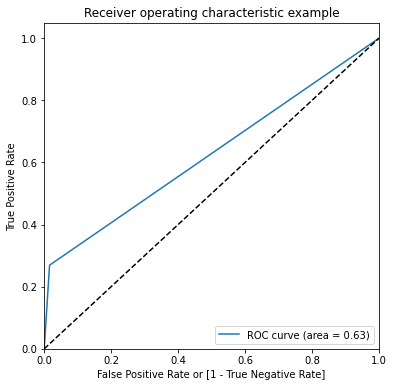

(array([0.       , 0.0160309, 1.       ]),
 array([0.       , 0.2691758, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [80]:
draw_roc(y_pred_final.churn_probability, y_pred_final.predicted)

In [81]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.churn_probability, y_pred_final.Churn_Pred))

'0.89'

#### We see an overall AUC score of 0.89 looks good.Now predicting churn probability on actual test.csv data

In [82]:
df_test_X[col].shape

(30000, 20)

In [83]:
# Predicted probabilities for test.csv data
y_test_pred = logsk.predict_proba(df_test_X)
# Converting y_pred to a dataframe which is an array
y_test_pred_df = pd.DataFrame(y_test_pred)
# Converting to column dataframe
y_test_pred_1 = y_test_pred_df.iloc[:,[1]]
# Let's see the head
y_test_pred_1.head()

1
0  0.211102
1  0.001279
2  0.165189
3  0.000102
4  0.043494

In [84]:
y_test_pred_1.shape

(30000, 1)

In [85]:
# Renaming the column 
y_test_pred_1= y_test_pred_1.rename(columns={ 1 : 'Churn_probability'})

# Let's see the head of y_pred_final
y_test_pred_1.head()

Churn_probability
0           0.211102
1           0.001279
2           0.165189
3           0.000102
4           0.043494

In [86]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_test_pred_1['churn_predicted_final'] = y_test_pred_1.Churn_probability.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_test_pred_1.head()

Churn_probability  churn_predicted_final
0           0.211102                      0
1           0.001279                      0
2           0.165189                      0
3           0.000102                      0
4           0.043494                      0

In [87]:
y_test_pred_1.churn_predicted_final.unique()

array([0, 1], dtype=int64)

In [88]:
df_test_X['Churn_probability'] = y_test_pred_1['Churn_probability'].values
df_test_X['Churn_probability_final'] = y_test_pred_1['churn_predicted_final'].values

In [89]:
df_test_X.Churn_probability_final.value_counts()

0    28789
1     1211
Name: Churn_probability_final, dtype: int64

In [90]:
df_test_X.to_csv('test_final.csv', encoding='utf-8')